In [1]:
class Validator:
    
    def __init__(self, classifier):
        self.classifier = classifier
        
        self.classify()
        
    
    def classify(self):
        
        if self.classifier == 'tt':
            print('ssak')
        elif self.classifier == 'tnn':
            print('plaz')
        elif self.classifier == 'tnt':
            print('gad')
        elif self.classifier == 'nnn':
            print('owad')
        elif self.classifier == 'nt':
            print('ryba')
        elif self.classifier == 'nnt':
            print('ptak')
        else:
            print('wrong classifier')
        
        
        
Validator('tt')
    
    

ssak


### Regresja

a 49.63722397476346
b 55.58359621451104


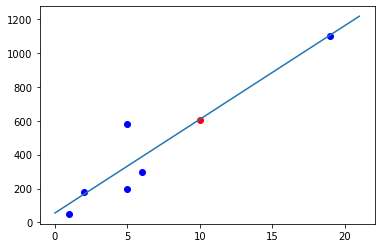

In [1]:
import matplotlib.pyplot as plt

def suma_x_y(liczbt_x, liczbt_y):
    xy = 0
    for i in range(len(liczbt_x)):
        suma = liczbt_x[i] * liczbt_y[i]
        xy += suma
    return xy

def count_b(liczbt_x, liczbt_y):
    g = (len(liczbt_x) * suma_x_y(liczbt_x, liczbt_y)) - (sum(liczbt_x) * sum(liczbt_y))
    d = (len(liczbt_x) * sum([x**2 for x in liczbt_x])) - (sum(liczbt_x)**2)
    b = g/d
    return b


def count_a(liczbt_x, liczbt_y, b):
    sr_y = sum(liczbt_y)/len(liczbt_x)
    sr_x = sum(liczbt_x)/len(liczbt_x)
    
    return sr_y - b * sr_x


while True:
    try:
#         liczbt_x = input('Podaj x: ').split(',')
#         liczbt_y = input('Poday y: ').split(',')
#         x = float(input('Podaj liczbe y: '))
        
        liczbt_x = [5,6,2,1,19,5]
        liczbt_y = [200,300,180,50,1100,580]
        x = 10
        
        if len(liczbt_x) != len(liczbt_y): continue
        
        b = count_b(liczbt_x, liczbt_y)
        a = count_a(liczbt_x, liczbt_y, b)
        y = a + b * x
        
        print('a', a)
        print('b', b)
        
        plt.scatter(liczbt_x, liczbt_y , c= 'blue')  
        plt.scatter(x, y , c= 'red') 
        
        c = list(zip(liczbt_x,liczbt_y))
        c = list(sorted(c,key=lambda l:l[1]))
        
        x_max = max([5,6,2,1,19,5]) + 2
        y_max = a + b * x_max
        
        plt.plot([0, x_max], [b,y_max])
        plt.show()
        
        break
        
        
    except:
        print('Something was wrong. Try agai')
        break

od prowadzacy


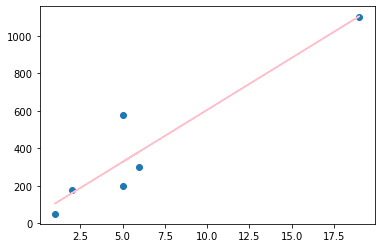

In [6]:
x = [5,6,2,1,19,5]
y = [200,300,180,50,1100,580]

import matplotlib.pyplot as plt
from scipy import stats

s, inter, r, p, err = stats.linregress(x, y)


def fun(x):
    return s * x + inter

model = list(map(fun, x))

plt.scatter(x, y)
plt.plot(x, model, c='pink')

plt.show()

### Problem plecakowy

- ukrasc najcenniesze produkcj nie przekreczajace np 30 kg
- do momentu zaleplnienia dobieramy produkty o najwyzszym wspolczynniky cena/waga
- produkt mozna wziac tylko raz


zad 1 
- napisz program wygeneruj plik z x i y (cena od 1 -100), waga 1 do 12 z 100 produktow ( bez powtorzen) 
- wypisz jakie produkty zostaly skradzione  do 30kg skradzionych - 


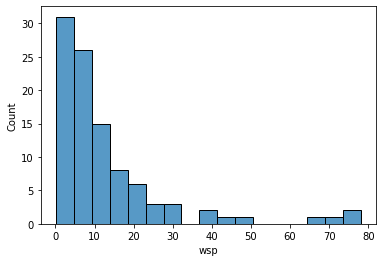

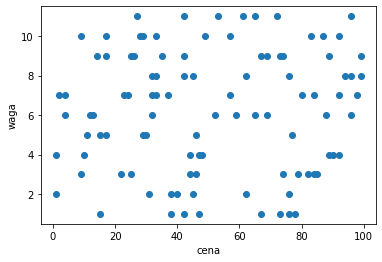

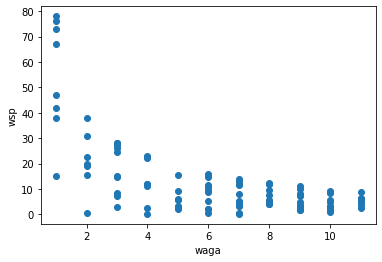

,cena,waga,wsp
0,78,1,78.0
1,76,1,76.0
2,73,1,73.0
3,67,1,67.0
4,47,1,47.0


In [47]:
import random
import pandas as pd
import seaborn as sns

def get_price():
    return random.randrange(1, 100)

def get_weight():
    return random.randrange(1, 12)

items = set()
while len(items) < 100:
    items.add((get_price(), get_weight()))

items = [ [i[0],i[1], round(i[0]/i[1], 1)] for i in items] 

data = {
    'cena': [ i[0] for i in items],
    'waga': [ i[1] for i in items],
    'wsp': [ i[2] for i in items],
}

df = pd.DataFrame(data)

df = df.sort_values(by='wsp', ascending= False)

df.head(10)

sns.histplot(data=df, x="wsp")
plt.show()

plt.scatter(df['cena'], df['waga'])
plt.xlabel('cena')
plt.ylabel('waga')
plt.show()

plt.scatter(df['waga'], df['wsp'])
plt.xlabel('waga')
plt.ylabel('wsp')
plt.show()

df = df.reset_index(drop=True)
df.head()

In [48]:
plecak = 0
plecak_list = []
plecak_max = 30
items_sorted = sorted(items,key=lambda l:l[2], reverse=True)

while plecak <= 30:
    no_more_sace = True
    for i in items_sorted:
        if plecak + i[1] <= plecak_max:
            plecak += i[1]
            plecak_list.append(i)
            items_sorted.remove(i)
            continue
        else:
            continue
        if  i[1] + plecak <= plecak_max:
            no_more_sace = False
            
    if no_more_sace == True:
        break
        

print('plecak waga', plecak)
print('plecak lista:', plecak_list)

plecak waga 29
plecak lista: [[78, 1, 78.0], [73, 1, 73.0], [47, 1, 47.0], [38, 1, 38.0], [62, 2, 31.0], [84, 3, 28.0], [79, 3, 26.3], [92, 4, 23.0], [90, 4, 22.5], [40, 2, 20.0], [96, 6, 16.0], [15, 1, 15.0]]
